In [1]:
# code for automatically reloading changes from modules (used for testing)
%load_ext autoreload
%autoreload 2

In [2]:
from mirror_benchmarking_iceberg import MB_Experiment_Iceberg

from selene_sim import DepolarizingErrorModel, Stim, Quest
# from selene_custom_error_model import (
#     BasicErrorModel,
#     OneQubitErrorRates,
#     TwoQubitErrorRates,
# )

In [10]:
# select parameters and build experiment

n_qubits = 50
seq_lengths = [2, 10] # half of circuit depth
seq_reps = 10 # number of repetitions of each sequence length
filename = 'exp_MB_example.py'

exp = MB_Experiment_Iceberg(n_qubits, seq_lengths, seq_reps)

# additional options
#exp.options['SQ_type'] = 'Clifford' # Clifford by default or 'Clifford+T'
#exp.options['Pauli_twirl'] = True # True by default
#exp.options['permute'] = True # True by default

exp.add_settings()

Having setup our MB experiment, we can now either simulate using a local simulator or submit to a hardware or emulator backend.

### Run local simulation using Selene

In [11]:
# setup error model

error_model = DepolarizingErrorModel(
    random_seed=1234,
    # single qubit gate error rate
    p_1q=3e-5,
    # two qubit gate error rate
    p_2q=1e-3,
    # set state preparation and measurement error rates to 0
    p_meas=1e-3,
    p_init=0,
)

In [12]:
# simulate experiment

shots = 100
simulator = Stim() # use Quest() if SQ_type = 'Clifford+T'

exp.sim(shots, error_model=error_model, simulator=simulator)

Simulating ...
1/20 circuits complete
2/20 circuits complete
3/20 circuits complete
4/20 circuits complete
5/20 circuits complete
6/20 circuits complete
7/20 circuits complete
8/20 circuits complete
9/20 circuits complete
10/20 circuits complete
11/20 circuits complete
12/20 circuits complete
13/20 circuits complete
14/20 circuits complete
15/20 circuits complete
16/20 circuits complete
17/20 circuits complete
18/20 circuits complete
19/20 circuits complete
20/20 circuits complete


### Submit to Quantinuum Hardware or Emulator backend using Nexus

In [ ]:
# Choose domain and login to Nexus

import qnexus
from qnexus.config import CONFIG

CONFIG.domain = "qa.myqos.com"
qnexus.login()

In [ ]:
# choose nexus project and setup quantinuum backend config

project = qnexus.projects.get_or_create(name='MB-example-project')
qnexus.context.set_active_project(project)

backend_config = qnexus.QuantinuumConfig(device_name='Helios-1E')

In [ ]:
# submit experiment. Returns a qnexus ExecuteJobRef

shots = 100

execute_job_ref = exp.submit(shots, backend_config)

In [ ]:
# inspect status of the execution job

qnexus.jobs.status(execute_job_ref)

In [ ]:
# retrieve results

exp.retrieve(execute_job_ref)

### Analyze experiment results

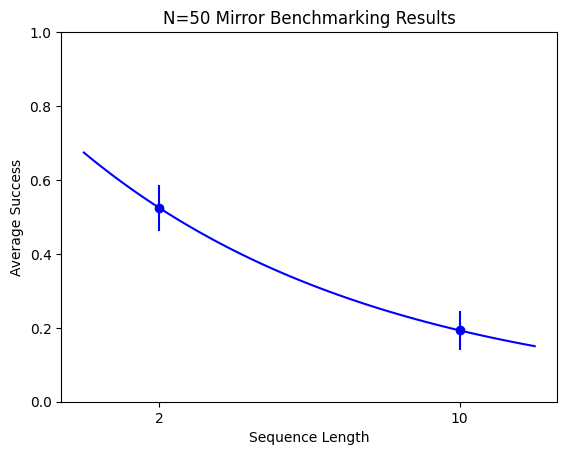

Success Probabilities
----------------------
2: 0.525 +/- 0.0621
10: 0.193 +/- 0.0518

Max circuit depth with survival > 2/3: 2

TQ Average Fidelity (for depolarizing error) = 0.998 +/- 0.0006


PicklingError: Can't pickle <class 'mirror_benchmarking_iceberg.MB_Experiment_Iceberg'>: it's not the same object as mirror_benchmarking_iceberg.MB_Experiment_Iceberg

In [13]:
exp.analyze_results(ylim=(0,1))

In [ ]:
# save experiment object to working directory

exp.save()